# KNN Image Classification with OpenCV and Computer Vision Studio

## Load Important Libraries


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from imutils import paths
import seaborn as sns
import random
import time
from datetime import datetime

In [2]:
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [3]:
import os
from skillsnetwork import cvstudio

## Download Your Images and Annotations


In [4]:
# Initialize the CV Studio Client
cvstudioClient = cvstudio.CVStudio()

# Download All Images
cvstudioClient.downloadAll()

100%|██████████| 400/400 [01:55<00:00,  3.47it/s]


In [5]:
annotations = cvstudioClient.get_annotations()

In [6]:
first_five = {k: annotations["annotations"][k] for k in list(annotations["annotations"])[:5]}
first_five

{'584f19d3-d6c7-4a90-9de4-41bf63df36d0.jpg': [{'label': 'cat'}],
 '5ece9b46-4cec-43c8-9d9d-698b1d680eb7.jpg': [{'label': 'dog'}],
 'aa10b34d-1488-4136-9654-b857acf92ef1.jpg': [{'label': 'dog'}],
 '3dd8f735-0390-45a0-afa1-ab025d0ba500.jpg': [{'label': 'dog'}],
 'fecb4e95-acc7-4972-b6f5-7e19bf4ebb27.jpg': [{'label': 'cat'}]}

# Load and Plot and Image
We will train and classify your images using the k-NN classifier using the OpenCV library.

In [7]:
random_filename = 'images/' + random.choice(list(annotations["annotations"].keys()))

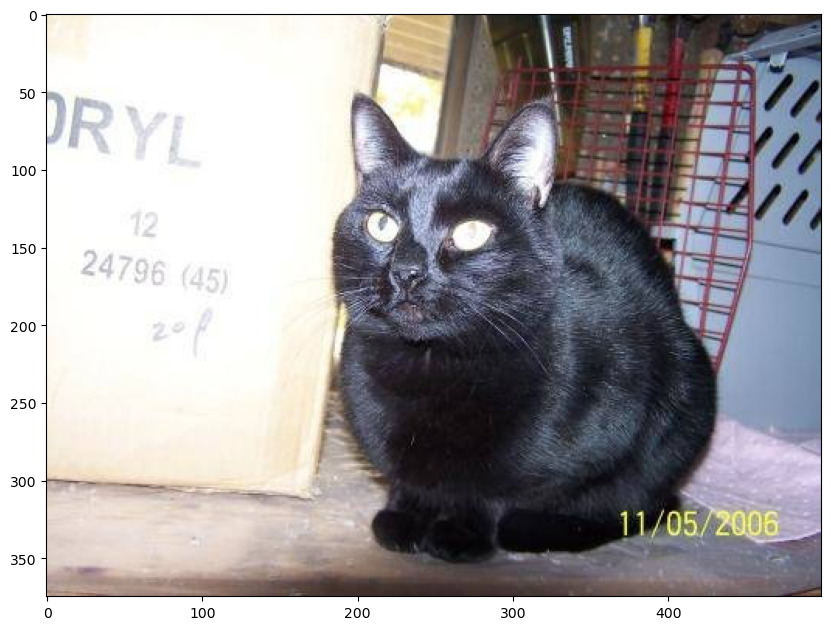

In [8]:
sample_image = cv2.imread(random_filename)
## Convert to RGB
image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
## Now plot the image
plt.figure(figsize=(10,10))
plt.imshow(image, cmap = "gray")
plt.show()

In [ ]:
# For a different color space
# plt.imshow(sample_image)
# plt.show()

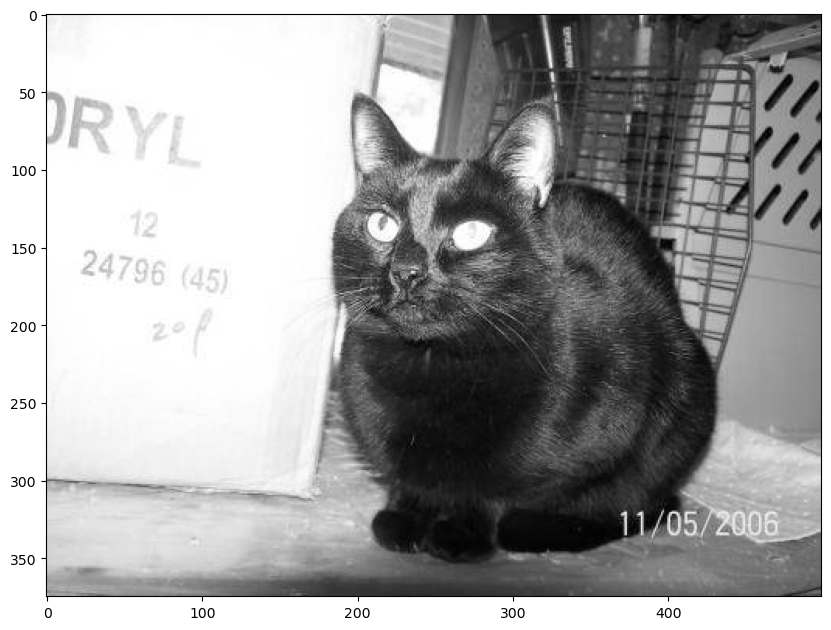

In [9]:
sample_image = cv2.cvtColor(sample_image,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.imshow(sample_image, cmap = "gray")
plt.show()

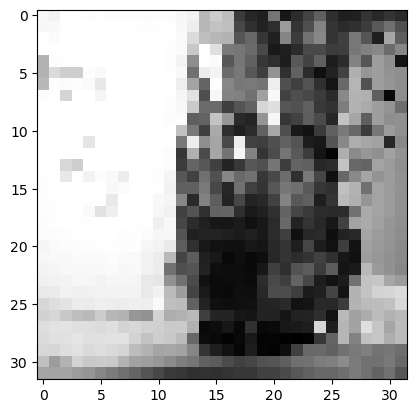

In [10]:
sample_image = cv2.resize(sample_image, (32, 32))
plt.imshow(sample_image, cmap = "gray")
plt.show()

In [11]:
pixels = sample_image.flatten()
pixels

array([248, 243, 254, ..., 102, 115,  89], dtype=uint8)

## Repeat the Process Above for All Images


In [12]:
image_paths = list(paths.list_images('images'))
train_images = []
train_labels = []
class_object = annotations['labels']

# loop over the input images
for (i, image_path) in enumerate(image_paths):
    #read image
    image = cv2.imread(image_path)
    #make images gray
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    #label image using the annotations
    label = class_object.index(annotations["annotations"][image_path[7:]][0]['label'])
    tmp_label = annotations["annotations"][image_path[7:]][0]['label']
    # resize image
    image = cv2.resize(image, (32, 32))
    # flatten the image
    pixels = image.flatten()
    #Append flattened image to
    train_images.append(pixels)
    train_labels.append(label)
    print('Loaded...', '\U0001F483', 'Image', str(i+1), 'is a', tmp_label)

Loaded... 💃 Image 1 is a cat
Loaded... 💃 Image 2 is a cat
Loaded... 💃 Image 3 is a cat
Loaded... 💃 Image 4 is a cat
Loaded... 💃 Image 5 is a dog
Loaded... 💃 Image 6 is a dog
Loaded... 💃 Image 7 is a cat
Loaded... 💃 Image 8 is a cat
Loaded... 💃 Image 9 is a cat
Loaded... 💃 Image 10 is a dog
Loaded... 💃 Image 11 is a cat
Loaded... 💃 Image 12 is a cat
Loaded... 💃 Image 13 is a cat
Loaded... 💃 Image 14 is a cat
Loaded... 💃 Image 15 is a cat
Loaded... 💃 Image 16 is a cat
Loaded... 💃 Image 17 is a dog
Loaded... 💃 Image 18 is a dog
Loaded... 💃 Image 19 is a dog
Loaded... 💃 Image 20 is a cat
Loaded... 💃 Image 21 is a dog
Loaded... 💃 Image 22 is a dog
Loaded... 💃 Image 23 is a cat
Loaded... 💃 Image 24 is a dog
Loaded... 💃 Image 25 is a cat
Loaded... 💃 Image 26 is a cat
Loaded... 💃 Image 27 is a cat
Loaded... 💃 Image 28 is a cat
Loaded... 💃 Image 29 is a cat
Loaded... 💃 Image 30 is a dog
Loaded... 💃 Image 31 is a dog
Loaded... 💃 Image 32 is a cat
Loaded... 💃 Image 33 is a dog
Loaded... 💃 Image 3

In [13]:
train_images = np.array(train_images).astype('float32')
train_labels = np.array(train_labels)

In [14]:
train_labels = train_labels.astype(int)
train_labels = train_labels.reshape((train_labels.size,1))
print(train_labels)

[[1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]


In [15]:
test_size = 0.2
train_samples, test_samples, train_labels, test_labels = train_test_split(
    train_images, train_labels, test_size=test_size, random_state=0)

In [16]:
start_datetime = datetime.now()

knn = cv2.ml.KNearest_create()
knn.train(train_samples, cv2.ml.ROW_SAMPLE, train_labels)

## get different values of K
k_values = [1, 2, 3, 4, 5]
k_result = []
for k in k_values:
    ret,result,neighbours,dist = knn.findNearest(test_samples,k=k)
    k_result.append(result)
flattened = []
for res in k_result:
    flat_result = [item for sublist in res for item in sublist]
    flattened.append(flat_result)

end_datetime = datetime.now()
print('Training Duration: ' + str(end_datetime-start_datetime))

Training Duration: 0:00:00.243650


In [17]:
## create an empty list to save accuracy and the cofusion matrix
accuracy_res = []
con_matrix = []
## we will use a loop because we have multiple value of k
for k_res in k_result:
    label_names = [0, 1]
    cmx = confusion_matrix(test_labels, k_res, labels=label_names)
    con_matrix.append(cmx)
    ## get values for when we predict accurately
    matches = k_res==test_labels
    correct = np.count_nonzero(matches)
    ## calculate accuracy
    accuracy = correct*100.0/result.size
    accuracy_res.append(accuracy)
## stor accuracy for later when we create the graph
res_accuracy = {k_values[i]: accuracy_res[i] for i in range(len(k_values))}
list_res = sorted(res_accuracy.items())

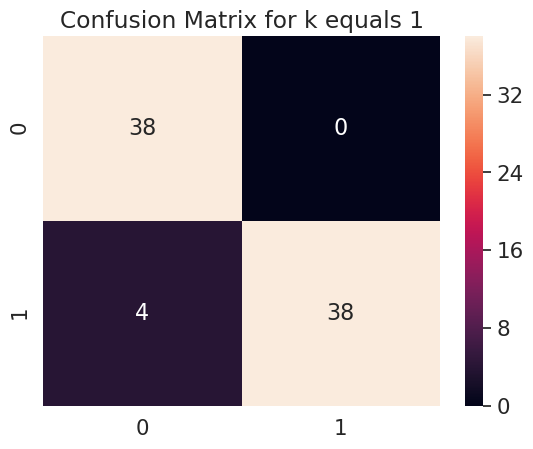

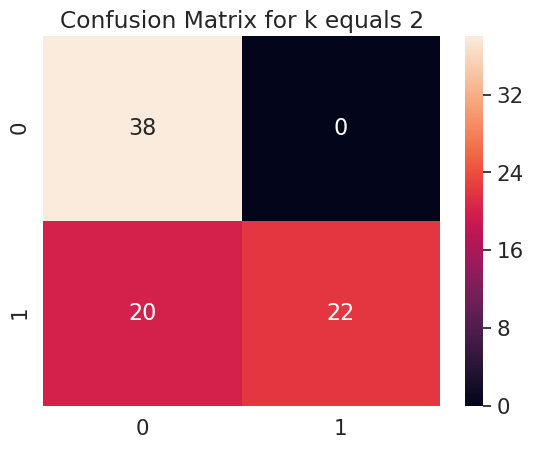

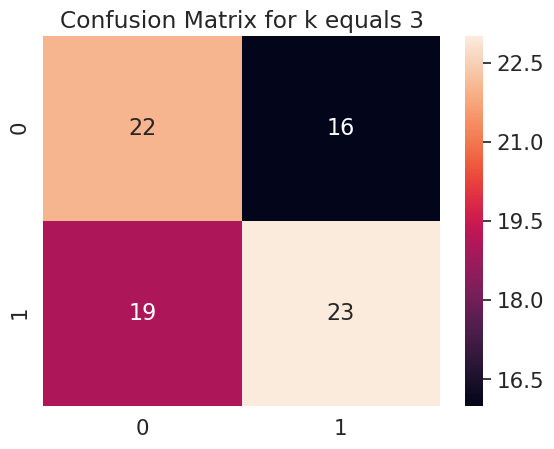

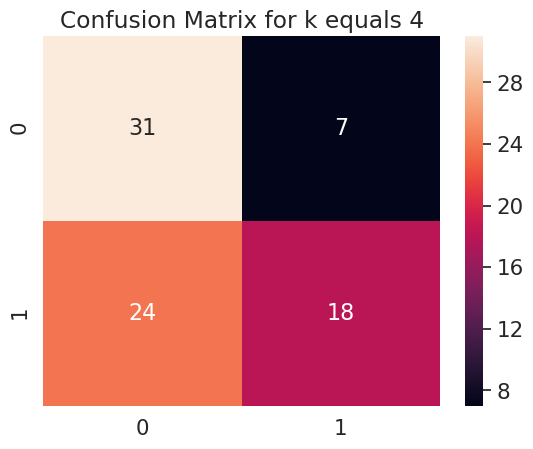

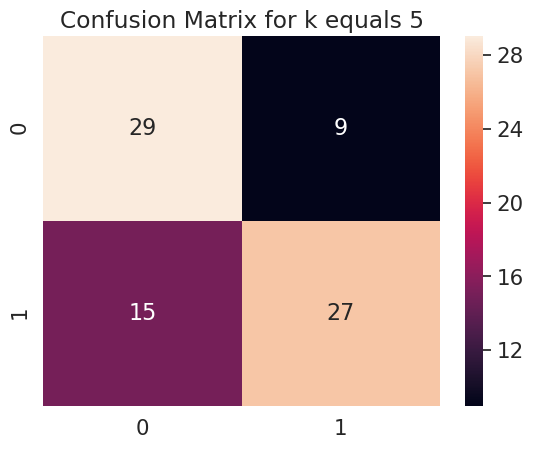

In [18]:
t=0
## for each value of k we will create a confusion matrix
for array in con_matrix:
    df_cm = pd.DataFrame(array)
    sns.set(font_scale=1.4) # for label size
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt = ".0f") # font size
    t += 1
    title = "Confusion Matrix for k equals " + str(t)
    plt.title(title)
    plt.show()


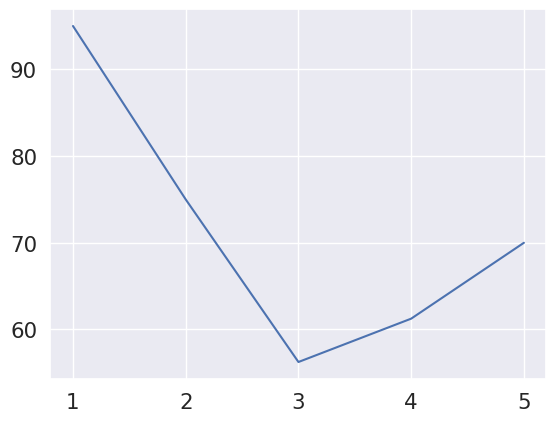

In [19]:
## plot accuracy against 
x, y = zip(*list_res)
plt.plot(x, y)
plt.show()

In [20]:
k_best = max(list_res,key=lambda item:item[1])[0]
k_best

1

## Let's Report Our Results Back to CV Studio


In [21]:
parameters = {
    'k_best': k_best
}
result = cvstudioClient.report(started=start_datetime, completed=end_datetime, parameters=parameters, accuracy=list_res)

if result.ok:
    print('Congratulations your results have been reported back to CV Studio!')

Congratulations your results have been reported back to CV Studio!


Save the KNN model to a file:


In [22]:
knn.save('knn_samples.yml')

Upload Model back to CVStudio


In [23]:
result = cvstudioClient.uploadModel('knn_samples.yml', {'k_best': k_best})

File Uploaded
